# Exploring The Bike Sharing Data of Two American Cities
## by Muhammad Usman Siddiqui

## Investigation Overview

> This presentaion summarises the key findings of data exploration efforts done on the bike sharing system data of the San Francisco bay area and New York City. The relationships between the year of birth, the type of user (customer or subscriber), and the gender with the trip duration are explored. Furthermore, the trend of these variables are compared for both cities.

## Dataset Overview

> The data consists of two data sets, one for each city. The data set for San Francisco contains 183412 trips and 16 columns and the data set for New York contains 943744 trips and 15 columns. The numerical values are of type int and float and all the other values are of type object. Some of the rows contain null values, and rougly 5 columns are used out of the given 15 and 16.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv ('201902-fordgobike-tripdata.csv')
df2 = pd.read_csv ('201902-citibike-tripdata.csv')

In [3]:
#All the cleaning steps performerd are listed below

df = df[df['member_gender'].notnull()]
df = df[df['end_station_name'].notnull()]
indexl = df2[df2['gender'] == 0].index
df2.drop(indexl , inplace=True)
df = df[df.member_birth_year != 1878] 
df2 = df2[df2['birth year'] >= 1897 ]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Does the type of user imact the trip duration?

> The plot shows that a higher proportion of customers have a longer trip duration than subscribers. To support this plot, the mean trip duration of customers is 1311 sec and that of subscribers is 641 sec, so customers tend to have a longer duration. 

In [4]:
# All the computations done to get data for the plots 
df.reset_index(drop =True, inplace =True)
age_sub = []
sub = []
for i in range(0,174950):
    if df._get_value(i, 'user_type') == 'Subscriber':
        sub.append(df._get_value(i, 'duration_sec')) 
        age_sub.append(df._get_value(i, 'member_birth_year'))
        
age_cust = []
cust = []
for i in range(0,174950):
    if df._get_value(i, 'user_type') == 'Customer':
        cust.append(df._get_value(i, 'duration_sec'))  
        age_cust.append(df._get_value(i, 'member_birth_year'))
        
age_m = []
gend_m = []
for i in range(0,174950):
    if df._get_value(i, 'member_gender') == 'Male':
        gend_m.append(df._get_value(i, 'duration_sec'))
        age_m.append(df._get_value(i, 'member_birth_year'))
        
age_f = []
gend_f=[]
for i in range(0,174950):
    if df._get_value(i, 'member_gender') == 'Female':
        gend_f.append(df._get_value(i, 'duration_sec'))
        age_f.append(df._get_value(i, 'member_birth_year'))

age_o = []
gend_o = []
for i in range(0,174950):
    if df._get_value(i, 'member_gender') == 'Other':
        gend_o.append(df._get_value(i, 'duration_sec'))
        age_o.append(df._get_value(i, 'member_birth_year'))

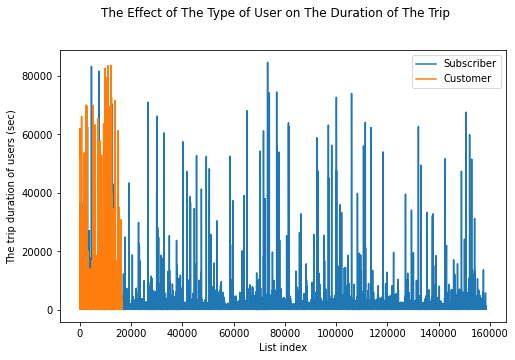

In [5]:
# Creating the plot
plt.figure(figsize=[8, 5])
x = np.linspace(0,(len(sub)-1),len(sub))
x2 = np.linspace(0,(len(cust)-1),len(cust))
plt.plot(x,sub)
plt.plot(x2,cust)
plt.plot
plt.suptitle("The Effect of The Type of User on The Duration of The Trip", y = 1)
plt.legend(['Subscriber', 'Customer'])
plt.xlabel('List index', size = 10)
plt.ylabel('The trip duration of users (sec)', size =10);

## Are there any interlinks between the gender, the birth year,  and the trip duration?

> The plot shows that most of the users with a longer trip duration were born after 1970. The trend of the trip duration with the birth year is similar for all the genders. Thus, we conclude gender does not significantly impact the trip duration. 

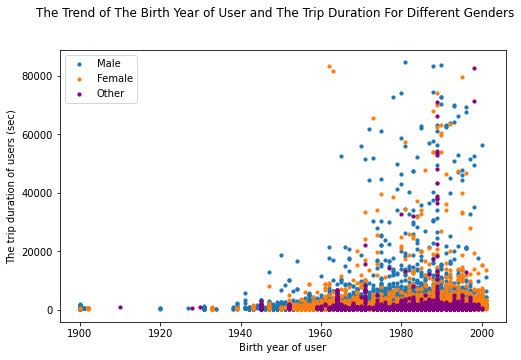

In [6]:
# Plotting the scatter plot of birth year vs trip duration for all three genders.
# To compare the trend for all three genders.
plt.figure(figsize=[8, 5])
plt.scatter(age_m , gend_m, s= 10)
plt.scatter(age_f, gend_f, s = 10)
plt.scatter(age_o, gend_o, s = 10, c = 'purple')
plt.legend(['Male', 'Female', 'Other'])
plt.suptitle("The Trend of The Birth Year of User and The Trip Duration For Different Genders", y = 1)
plt.xlabel('Birth year of user', size =10)
plt.ylabel('The trip duration of users (sec)', size =10);

## Are the resultd consistent for both cities?

> The plot reinforces that most of the longest trips were by taken by users born after 1970. Furthermore, longer trips were taken in New York than in San Francisco. However, the mean trip duration of 704 sec for San Francisco is similar to the mean trip duration of 757 sec for New York.

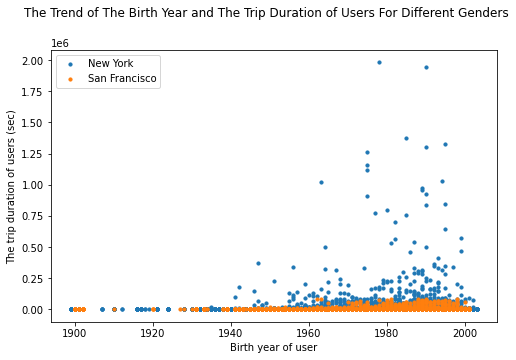

In [7]:
# Plotting the scatter plot of birth year vs trip duration for all users in both users
# To compare the trends in the two cities.
plt.figure(figsize=[8, 5])
plt.scatter(df2['birth year'], df2['tripduration'], s = 10)
plt.scatter(df['member_birth_year'], df['duration_sec'], s = 10)
plt.legend(['New York', 'San Francisco'])
plt.suptitle("The Trend of The Birth Year and The Trip Duration of Users For Different Genders", y = 1)
plt.xlabel('Birth year of user', size =10)
plt.ylabel('The trip duration of users (sec)', size =10);

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt